### **Dataset :-**
https://www.kaggle.com/code/nitsin/pca-demo-1/input

In [ ]:
import zipfile

with zipfile.ZipFile('/content/train.csv.zip', 'r') as zip_ref:
    zip_ref.extractall()

### **Without Using PCA**

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv('train.csv')
df.shape

(42000, 785)

In [ ]:
df.sample()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
4833,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


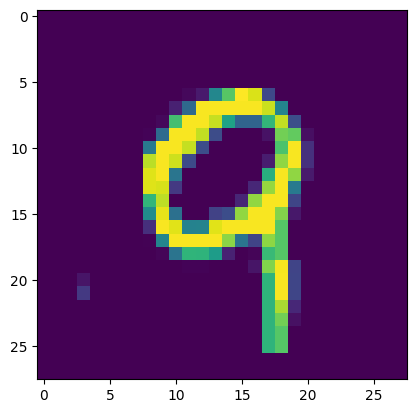

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(df.iloc[32578,1:].values.reshape(28,28))

In [ ]:
X = df.iloc[:,1:]
y = df.iloc[:,0]

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
X_train.shape

(33600, 784)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [ ]:
import time
start = time.time()
y_pred = knn.predict(X_test)
print(time.time() - start)

18.33557391166687


In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9648809523809524

### **Applying PCA**

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [ ]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=200)

In [ ]:
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

In [ ]:
X_train_trf.shape

(33600, 200)

In [ ]:
knn = KNeighborsClassifier()
knn.fit(X_train_trf,y_train)

KNeighborsClassifier()

In [ ]:
y_pred = knn.predict(X_test_trf)
accuracy_score(y_test,y_pred)

0.9507142857142857

### **Conclusion :-** We are getting 95% accuracy with 200 features almost equal to 96% with all 784 features.

### **Finding Optimum number of principle components required**

In [ ]:
pca = PCA(n_components=None)
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

In [ ]:
np.cumsum(pca.explained_variance_ratio_)

array([0.05785192, 0.09934462, 0.13738701, 0.16704964, 0.19286525,
       0.21541506, 0.23514574, 0.25289854, 0.26858504, 0.28294568,
       0.29664822, 0.30892077, 0.32038989, 0.33162017, 0.34220546,
       0.35240477, 0.36198153, 0.37140862, 0.38053351, 0.38943521,
       0.39783462, 0.40603525, 0.41388828, 0.42145568, 0.42882829,
       0.43584714, 0.44282633, 0.44953738, 0.45593583, 0.4622392 ,
       0.46839271, 0.4744166 , 0.48025334, 0.48603881, 0.49176214,
       0.49722614, 0.50265822, 0.50793994, 0.51307376, 0.51801392,
       0.52289063, 0.52771041, 0.53239246, 0.53698588, 0.54156249,
       0.54605468, 0.5505015 , 0.55491691, 0.55926803, 0.56358836,
       0.56780645, 0.57198888, 0.57606882, 0.58008887, 0.58407223,
       0.58801822, 0.59188694, 0.59571889, 0.59948441, 0.60322635,
       0.60687487, 0.6104829 , 0.61402176, 0.61750117, 0.62094441,
       0.62432378, 0.62767368, 0.63099377, 0.63426257, 0.63746765,
       0.64065542, 0.64376931, 0.64686564, 0.64992395, 0.65296

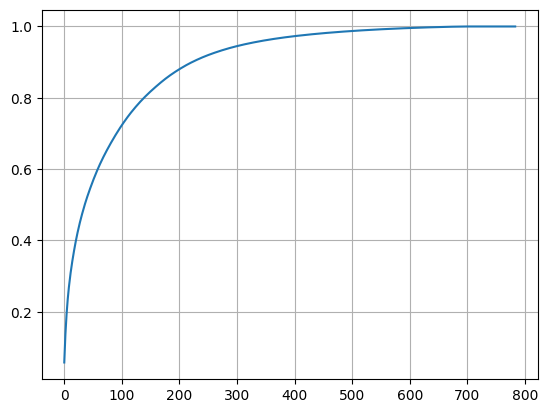

In [ ]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.grid()

In [ ]:
optimum_pca = 1

for i in np.cumsum(pca.explained_variance_ratio_):
  if i > 0.90:
    print(round(i,8))
    break
  optimum_pca += 1

print(optimum_pca)

0.90013248
223


In [ ]:
# PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=optimum_pca)

In [ ]:
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

In [ ]:
knn = KNeighborsClassifier()
knn.fit(X_train_trf,y_train)
y_pred = knn.predict(X_test_trf)
accuracy_score(y_test,y_pred)

0.9494047619047619